In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Exploring
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve
%matplotlib inline

pd.options.display.float_format = '{:20,.2f}'.format

import acquire
import summarize
import prepare

df = acquire.get_mall_customer_data()
df = prepare.data_prep(df, cols_to_remove=[], prop_required_column=.6, prop_required_row=.75)

In [2]:
train, test = train_test_split(df, random_state=42)

In [3]:
scaler = MinMaxScaler()
num_vars = list(train.select_dtypes('number').columns)

print('Scaling {}, and {}...'.format(', '.join(num_vars[:-1]), num_vars[-1]))
train[num_vars] = scaler.fit_transform(train[num_vars])

Scaling customer_id, age, annual_income, and spending_score...


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [4]:
# we should see a max of 1 for each variable and a min of 0.
train.describe()

,customer_id,age,annual_income,spending_score
count,150.00,150.00,150.00,150.00
mean,0.50,0.40,0.37,0.51
std,0.30,0.27,0.22,0.27
min,0.00,0.00,0.00,0.00
25%,0.24,0.21,0.20,0.35
50%,0.51,0.35,0.39,0.49
75%,0.76,0.59,0.52,0.73
max,1.00,1.00,1.00,1.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x104333f60>,
      dtype=object)

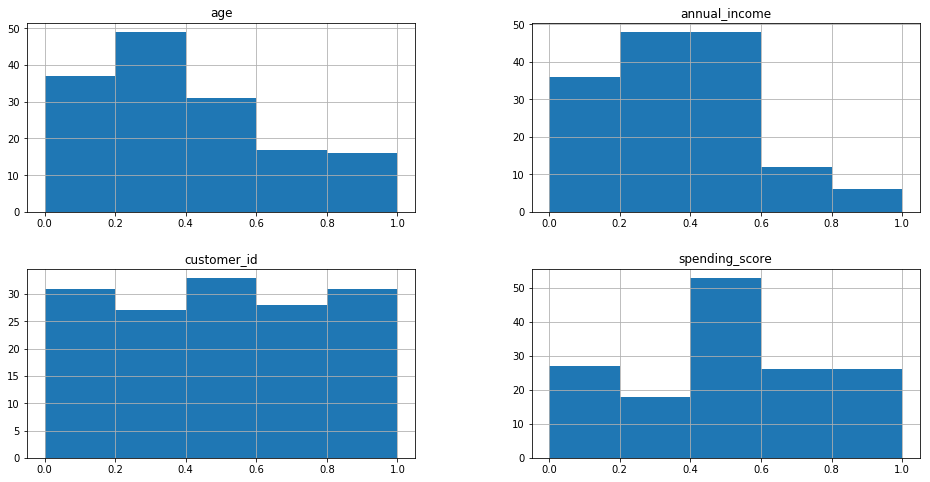

In [5]:
train.hist(figsize=(16, 8), bins=5, log=False)

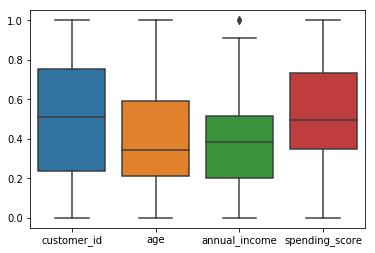

In [6]:
sns.boxplot(data=train)

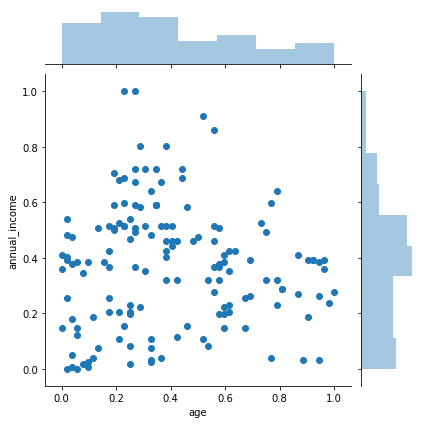

In [7]:
sns.jointplot(x="age", y="annual_income", data=train)

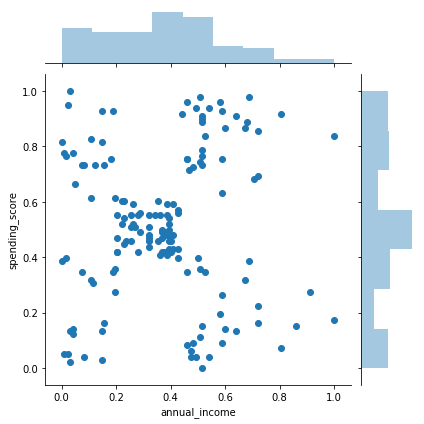

In [8]:
sns.jointplot(data=train, x='annual_income', y='spending_score')

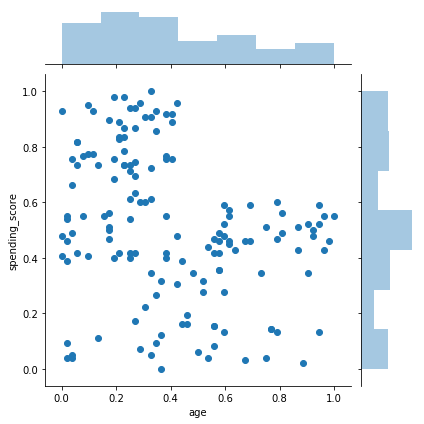

In [9]:
sns.jointplot(data=train, x='age', y='spending_score')

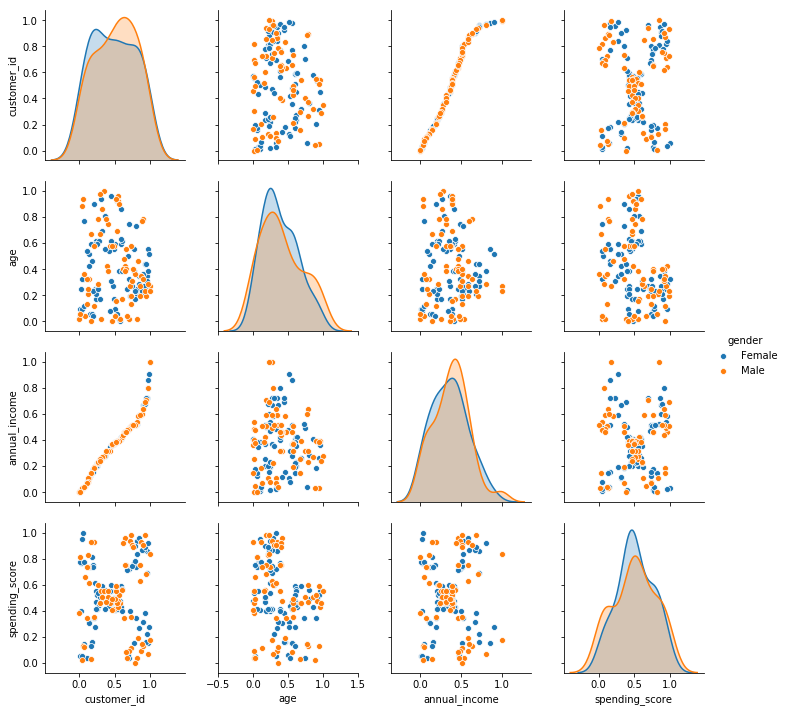

In [10]:
sns.pairplot(train, hue='gender')

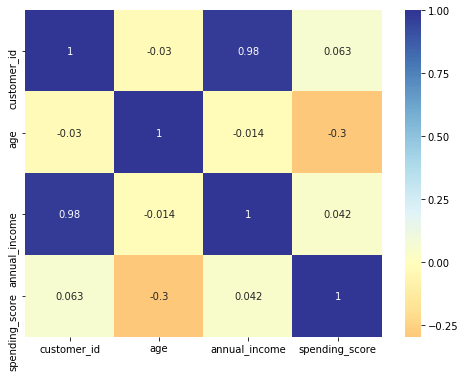

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(train.corr(), cmap='RdYlBu', annot=True, center=0)

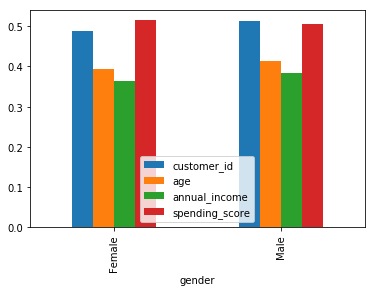

In [12]:
train.groupby('gender').mean().plot.bar()